In [1]:
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

import image_handler
from model import MSCNN

In [2]:
x, y = image_handler.load_images()

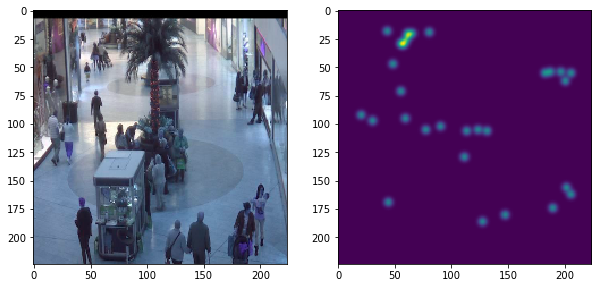

In [3]:
i = 1
image_handler.plot_images(x[i], y[i])

In [4]:
input_shape=(128, 128, 3)

model = MSCNN(input_shape)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 64) 200768      conv2d[0][0]                     
_____________________________________

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
opt = SGD(lr=1e-5, momentum=0.9, decay=0.0005)
model.compile(optimizer=opt, loss='mse')

model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split=0.1, verbose=1)

scores = model.evaluate(x_test, y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Use tf.cast instead.


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (224, 224, 3)